# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [2]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

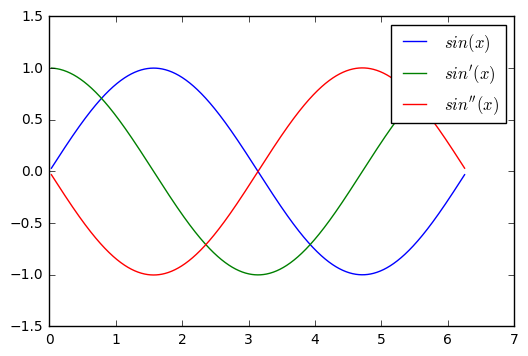

-5

In [3]:
n = 1000 # Setzt die Länge und Breite der Matrix bzw. ist gleichzusetzen mit der Anzahl der Gitterpunkte.

x = linspace(0,2*pi,n) # Erstellt die Definitionsbereich (x) der Funktion.
############# np.linspace(0,2*np.pi,N, endpoint = False, sonst kriegt man falsche Randbedingung)
y = sin(x) # Erstellt den Wertebereich (y) der Funktion.

# Erstellt D wie oben erklärt.
D = np.eye(n,k=+1) - np.eye(n,k=-1)
D[0,-1] = -1
D[-1,0] = 1
D[-1,:] = 0
y[-1] = 0

df = D.dot(y)/(2*2*pi/n) # Berechnet den Wertebereich der 1.Ableitung durch Matrix-Vektormultiplikation und schreibt diese in den Vektor df.
d2f = D.dot(df)/(2*2*pi/n) # Berechnet die Funktionswerte der 2.Ableitung durch Matrix-Vektormultiplikation und schreibt diese in den Vektor d2f.

# Dient zum Plotten der Funktionen:
# Die ersten 5 und die letzten 5 Gitterpunkte der Funktionen werden nicht beachtet, da diese sehr ungenau sind.
########## wenn man die Matrize D benutzen dann sind die so genau wie die andere Punkte :)
plot(x[5:n-5],y[5:n-5],'b',label='$sin(x)$')
plot(x[5:n-5],df[5:n-5],'g',label="$sin'(x)$")
plot(x[5:n-5],d2f[5:n-5],'r',label='''$sin''(x)$''')
legend()
show()
-7

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [9]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here
    t = linspace(0,2*np.pi,N,endpoint=False) # Erstellt eine 1xN Matrix t im Intervall von 0 bis 2pi mit N Elementen, wobei die Endpunkte vernachlässigt werden.
    
    h = abs(t[1]-t[0]) # Definiert h als den Abstand zwischen dem 1. und 2. Element der Liste t.
    
    D = np.eye(N,k=1) - np.eye(N,k=-1) # Erstellt eine Matrix mit Nullen auf der Urdiginalen, mit einer Diagonalen von Einsen darüber und einer Diagonalen von negativen Einsen darunter.       
    D[0,-1 ]= -1 # Setzt die letzte Spalte der obersten Reihe auf -1.        
    D[-1,0] = 1 # Setzt die erste Spalte der untersten Reihe auf 1.
    
    LGS = 1/(4*h**2) * D.dot(D) + (2 * gamma * (1/(2*h))) * D + (omega0**2) * np.eye(N)   
    # Berechnet den linken Teil der zweiten Gleichung ohne das x, welches gesucht ist.
    # D.dot(D) multipliziert die Matrix mit sich selbst                                                                                   
    # omega0 zum Quadrat wird mit der Einheitsmatrix (np.eye(N)) multipliziert, um eine Einheitsmatix mit omega0**2 in der Urdiagonalen zu erhalten, bevor sie mir der Matrix D multipliziert wird.
    
    b = A * cos(t) # Ddefiniert b als den rechten Term.
    
    x = np.linalg.solve(LGS,b)               # Berechnet aus dem LGS und b den gesuchten Vektor x.
    
    plot(t,x)                                # Plottet t gegen x.
    return x                                 # Gibt x zurück.

In [10]:
print(x)

[ 0.06664899  0.06657323  0.06623474  0.06563485  0.06477592  0.06366136
  0.06229556  0.0606839   0.05883275  0.05674941  0.05444211  0.05191996
  0.04919289  0.04627169  0.04316787  0.03989369  0.03646207  0.03288655
  0.02918124  0.02536076  0.0214402   0.01743502  0.01336104  0.00923432
  0.00507116  0.00088799 -0.00329869 -0.00747234 -0.01161651 -0.01571484
 -0.01975114 -0.0237095  -0.02757428 -0.03133024 -0.03496256 -0.03845689
 -0.04179946 -0.04497706 -0.04797715 -0.0507879  -0.05339822 -0.05579779
 -0.05797716 -0.05992772 -0.06164177 -0.06311255 -0.06433426 -0.06530206
 -0.06601215 -0.06646172 -0.06664899 -0.06657323 -0.06623474 -0.06563485
 -0.06477592 -0.06366136 -0.06229556 -0.0606839  -0.05883275 -0.05674941
 -0.05444211 -0.05191996 -0.04919289 -0.04627169 -0.04316787 -0.03989369
 -0.03646207 -0.03288655 -0.02918124 -0.02536076 -0.0214402  -0.01743502
 -0.01336104 -0.00923432 -0.00507116 -0.00088799  0.00329869  0.00747234
  0.01161651  0.01571484  0.01975114  0.0237095   0

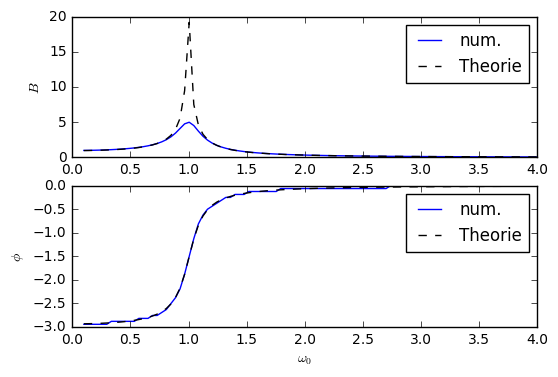

-5

In [11]:
L = 100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L) # Erstellt eine Matrix aus Nullen.
phi = np.zeros(L) # Erstellt eine Matrix mit Nullen

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith

for n in range(0,L): # Lässt n von 0 bis L laufen- 
    
    x = limit_cycle(omega0 = omega0[n],N = L) # Erzeugt eine 1xN Matrix x, welche mit den Werten der Funktion limit_cycle gefüllt ist.
    
    B[n] = x[x.argmax()] # Gibt den Maximalwert von B an der Stelle n aus.
    
    phi[n] = -x.argmax() * ((2 * pi) / L) # Gibt den Maximalwert von phi an der Stelle n aus.
    # -x, da die Funktion nach unten verläuft
    # (2*pi)/L, da phi ein Winkel ist und mit dem Bogenmaß gearbeitet wird.
A = 1 # Setzt A.
gamma = 0.1 # Setzt gamma.
Bth = np.zeros(L) # Erstellt eine NxN Matrix 'Bth', gefüllt mit Nullen.
phith = np.zeros(L)  # Erstellt eine Matrix gefüllt mir Nullen.    

for n in range(0,L): # Lässt n von 0 bis L laufen. 
    Bth[n] = A / (sqrt((omega0[n] ** 2 - 1) ** 2) + 4 * gamma ** 2) # Errechnet den theoretischen Wert von B nach der dritten Gleichung und ersetzt die Nullen mit dem Ergebnis.
    phith[n] = np.arctan2(-2 * gamma,omega0[n] ** 2 - 1) # Berechnet den theoretischen Wert von phi nach der vierten Gleichung und ersetzt die Nullen mit dem Ergebnis. 
############### richtig:  Bth = A/np.sqrt((omega0**2-1.)**2+4.*gamma**2) 
### falsche Operator Ordnung / falsche Klammer-Stelle 
### Bth[n] = A / (sqrt((omega0[n] ** 2 - 1) ** 2) + 4 * gamma ** 2) =>
### Bth[n] = A / (sqrt((omega0[n] ** 2 - 1) ** 2 + 4 * gamma ** 2))

subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()

-5